In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("Downloads/American.csv")
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [4]:
df.shape

(78682, 21)

In [5]:
df.describe

<bound method NDFrame.describe of       company_name status_label  year       X1       X2      X3       X4  \
0              C_1        alive  1999  511.267  833.107  18.373   89.031   
1              C_1        alive  2000  485.856  713.811  18.577   64.367   
2              C_1        alive  2001  436.656  526.477  22.496   27.207   
3              C_1        alive  2002  396.412  496.747  27.172   30.745   
4              C_1        alive  2003  432.204  523.302  26.680   47.491   
...            ...          ...   ...      ...      ...     ...      ...   
78677       C_8971        alive  2014  233.211   43.338  14.094   45.615   
78678       C_8971        alive  2015  105.559   59.184  42.592  202.133   
78679       C_8971        alive  2016   63.971   69.074  65.057   79.051   
78680       C_8971        alive  2017  135.207   66.527  65.330   69.171   
78681       C_8971        alive  2018   82.589   68.817  65.201   67.262   

            X5       X6       X7  ...        X9      

In [6]:
def summary(df):
    
    print(f'data shape: {df.shape}')

    summ=pd.DataFrame(df.dtypes,columns=['data type'])

    summ['#missing']=df.isnull().sum().values

    summ['%missing']=df.isnull().sum().values / len(df)*100

    summ['#unique']=df.nunique().values

    desc=pd.DataFrame(df.describe(include='all').transpose())

    summ['min']=desc['min'].values
    summ['max']=desc['max'].values
    summ['first value']=df.loc[0].values
    summ['second value']=df.loc[1].values
    summ['third value']=df.loc[2].values

    return summ




In [7]:
summary(df)

data shape: (78682, 21)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
company_name,object,0,0.0,8971,NaN,NaN,C_1,C_1,C_1
status_label,object,0,0.0,2,NaN,NaN,alive,alive,alive
year,int64,0,0.0,20,1999.0,2018.0,1999,2000,2001
X1,float64,0,0.0,65895,-7.76,169662.0,511.267,485.856,436.656
X2,float64,0,0.0,65690,-366.645,374623.0,833.107,713.811,526.477
X3,float64,0,0.0,36010,0.0,28430.0,18.373,18.577,22.496
X4,float64,0,0.0,59060,-21913.0,81730.0,89.031,64.367,27.207
X5,float64,0,0.0,38898,0.0,62567.0,336.018,320.59,286.588
X6,float64,0,0.0,55550,-98696.0,104821.0,35.163,18.531,-58.939
X7,float64,0,0.0,49577,-0.006,65812.0,128.348,115.187,77.528


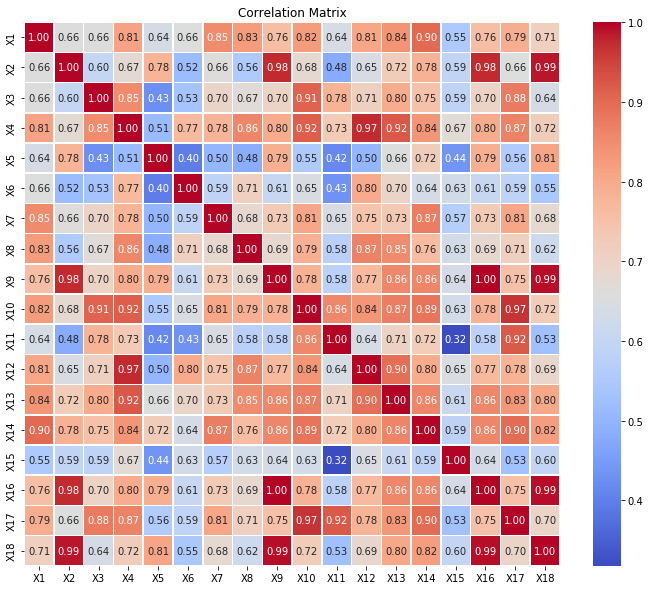

In [8]:
 variables=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
            'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 
           'X17', 'X18']
data=df[variables]
correlation_matrix=data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",
           linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [9]:
df['status_label']=df['status_label'].map({'alive' : 1,'failed':0})

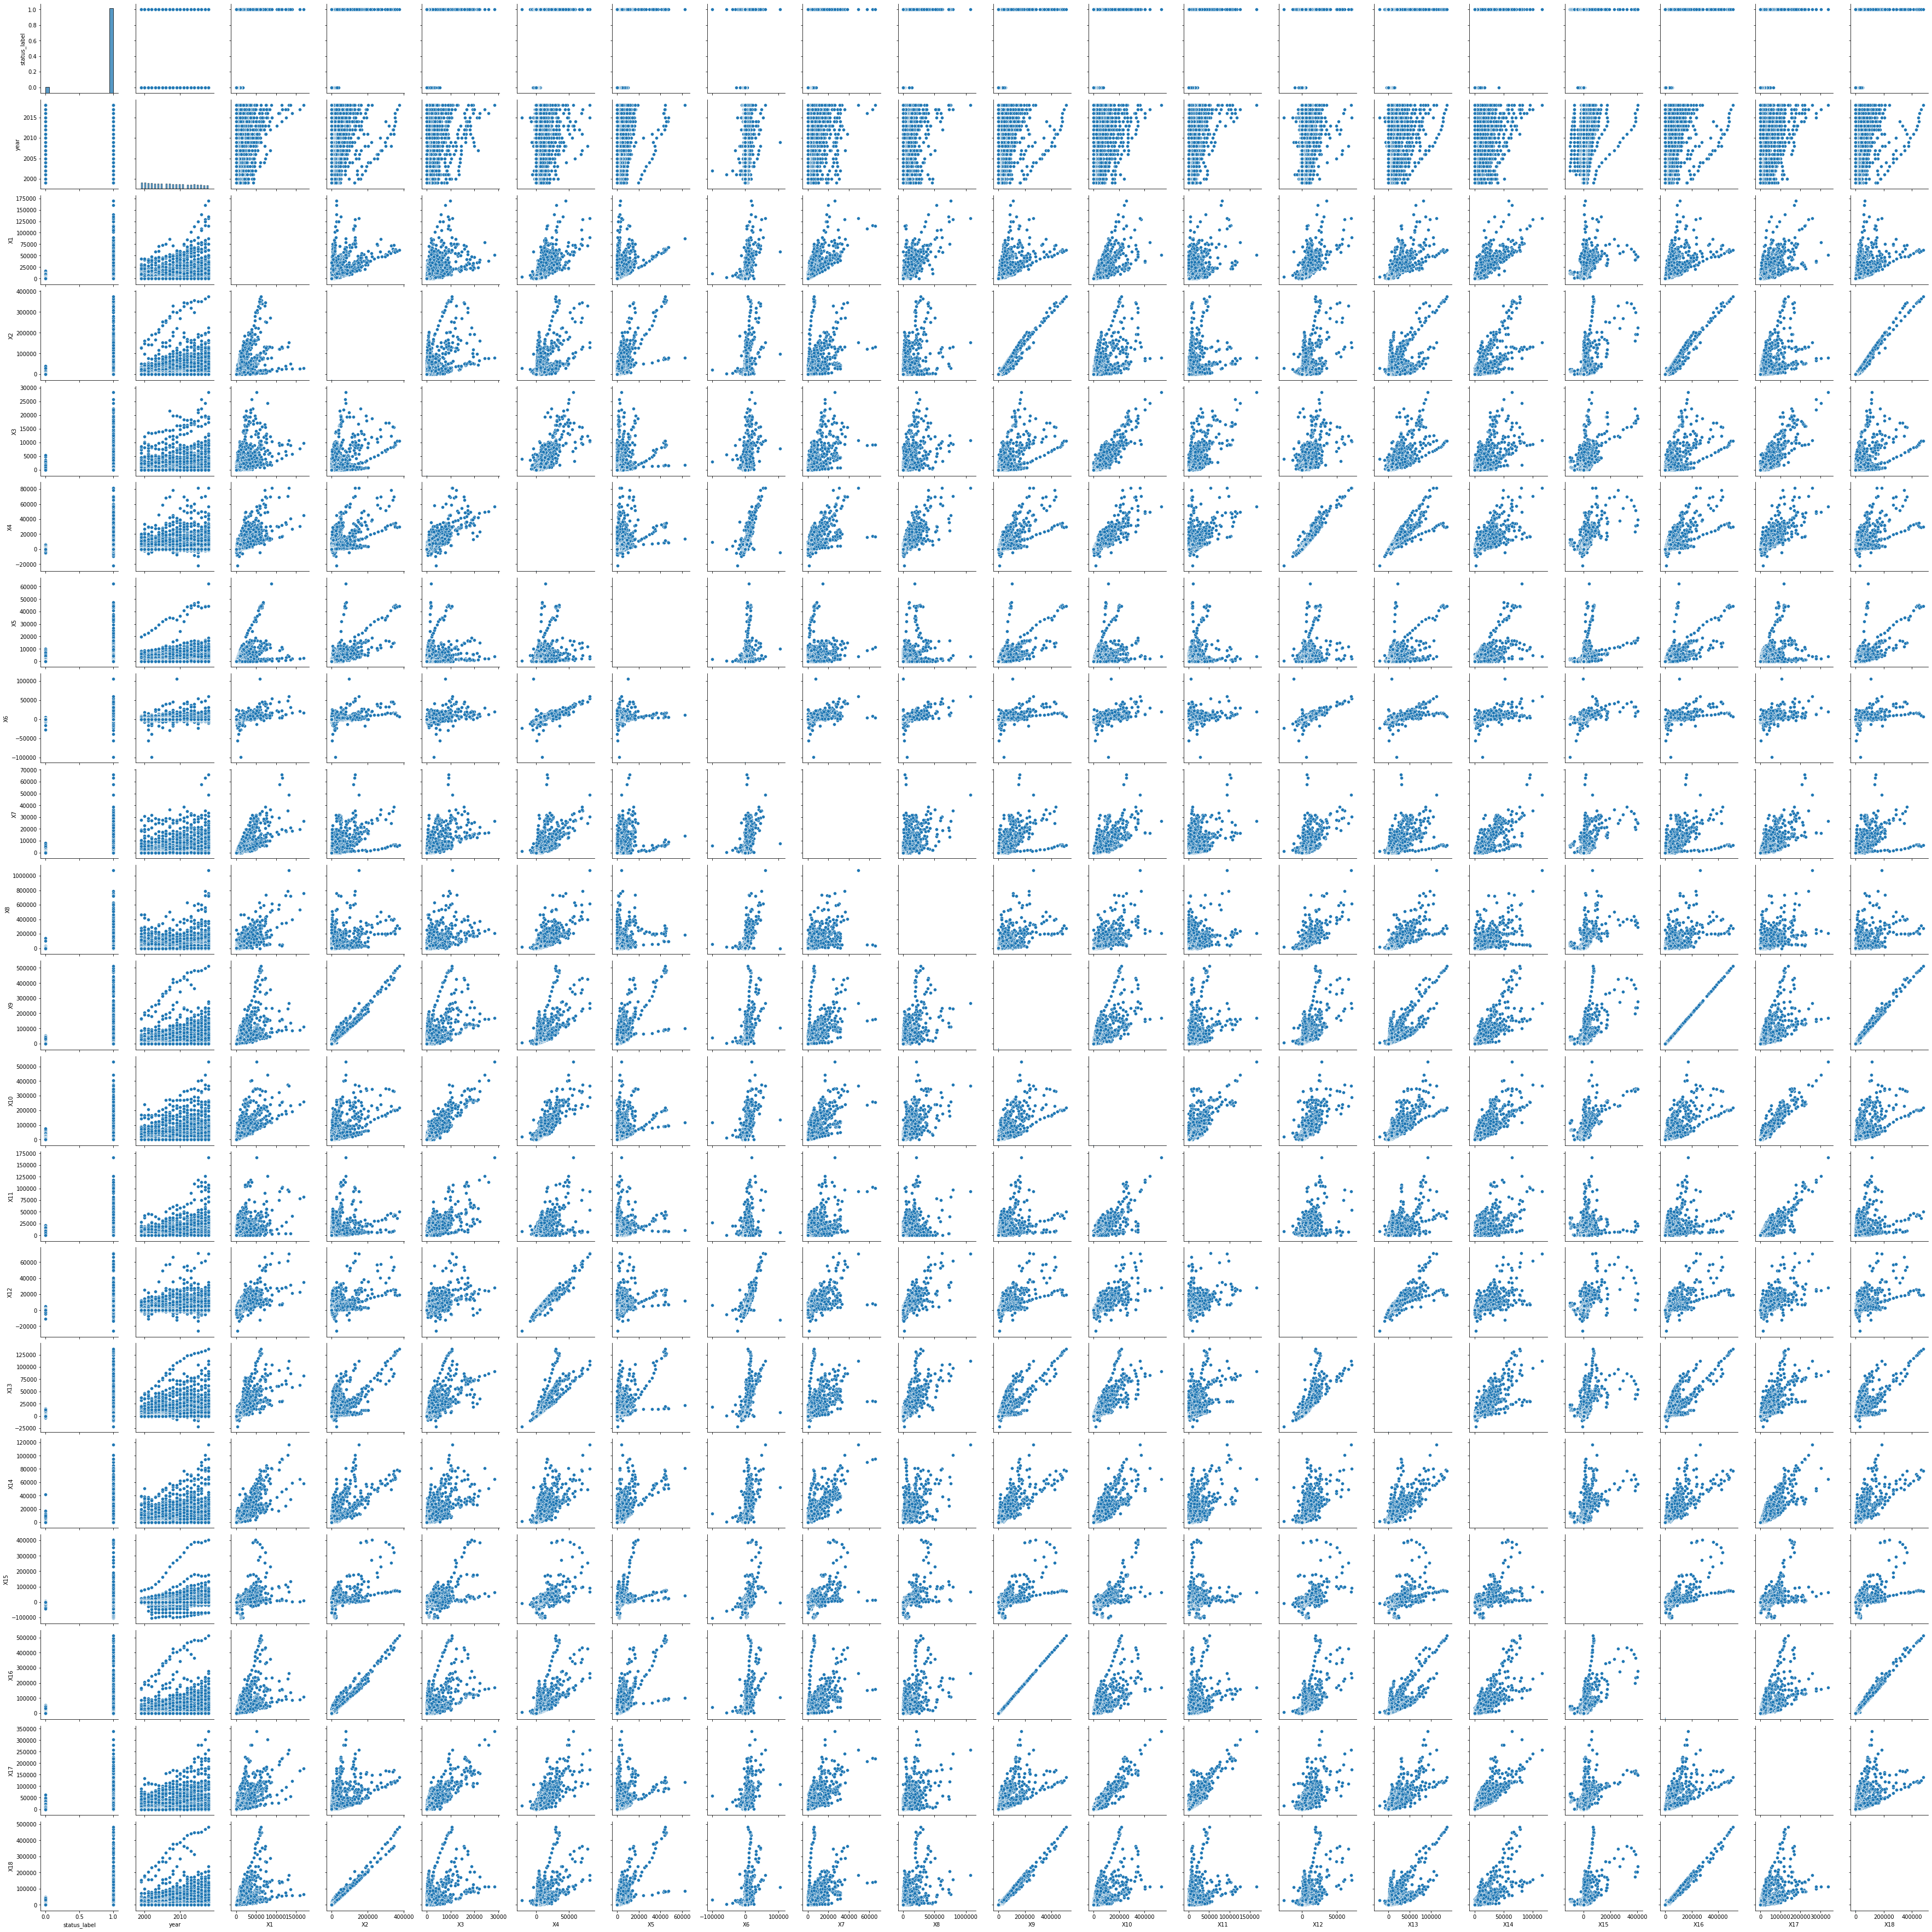

In [10]:
sns.pairplot(df)

In [11]:
df=df.drop(['company_name','year'],axis=1)

Accuracy: 0.932198004702294
Confusion Matrix:
[[    7  1061]
 [    6 14663]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.01      0.01      1068
           1       0.93      1.00      0.96     14669

    accuracy                           0.93     15737
   macro avg       0.74      0.50      0.49     15737
weighted avg       0.91      0.93      0.90     15737



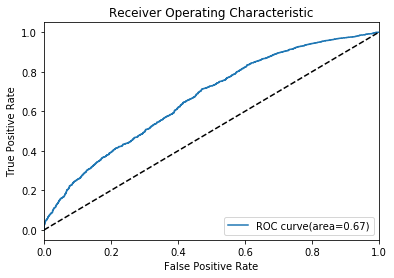

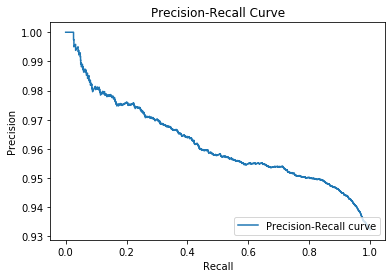

Cross-Validation Scores: [0.9346127  0.9316261  0.93174886 0.93397306 0.93359176]
Average Cross-Validation Score: 0.9331104951855582


In [15]:
X=df.drop('status_label',axis=1)
y=df['status_label']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,
                                              random_state=42)
model=LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm)

report=classification_report(y_test,y_pred)
print('Classification Report:')
print(report)

probas=model.predict_proba(X_test)
fpr,tpr,thresholds=roc_curve(y_test,probas[:,1])
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision,recall,thresholds=precision_recall_curve(y_test,probas[:,1])

plt.figure()
plt.plot(recall,precision,label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

cv_scores=cross_val_score(model,X_scaled, y,cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Average Cross-Validation Score:', np.mean(cv_scores))


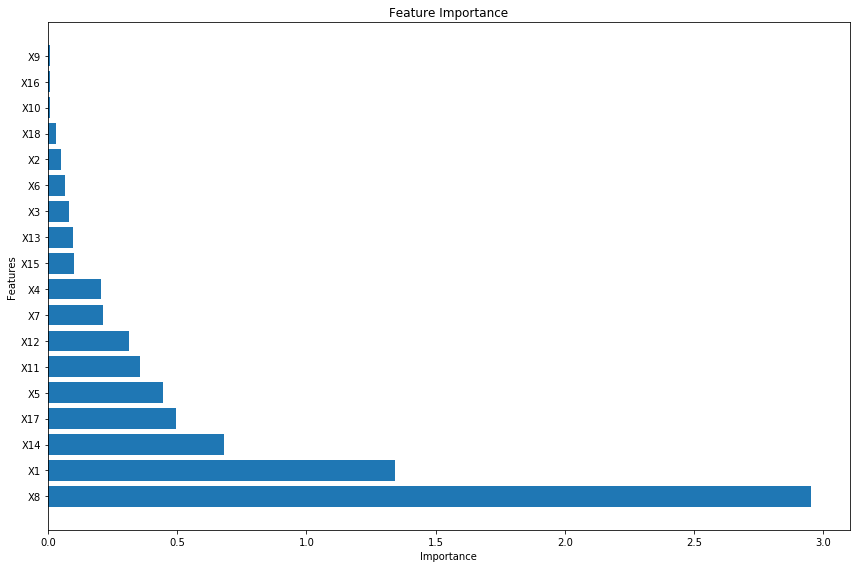

In [19]:
feature_importance=np.abs(model.coef_[0])
feature_names=df.drop('status_label',axis=1).columns
sorted_indices=np.argsort(feature_importance)[::-1]
sorted_feature_names=feature_names[sorted_indices]
sorted_feature_importance=feature_importance[sorted_indices]

plt.figure(figsize=(12,8))
plt.barh(range(len(feature_importance)),sorted_feature_importance,
        align='center')
plt.yticks(range(len(feature_importance)),sorted_feature_names)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()